In [ ]:
"""

Prepare clean stereographic grid for Justine's file with bounds and so on

"""

In [2]:
import xarray as xr
from cdo import Cdo
import multimelt.useful_functions as uf
from tqdm.notebook import tqdm
import numpy as np

In [3]:
inputpath_raw = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/raw/'
inputpath_interim = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/interim/'

In [4]:
nemo_grid_file = xr.open_dataset(inputpath_interim + 'NEMO_gridT_eORCA1_cdo.nc')

In [5]:
ISMIP_2km_grid = xr.open_dataset(inputpath_raw + 'Mask_Iceshelf_IMBIE2_v2.nc')

In [6]:
meshx,meshy = np.meshgrid(ISMIP_2km_grid.x,ISMIP_2km_grid.y)

In [7]:
half_res = 1000.

In [8]:
meshlon_ll,meshlat_ll = uf.change_coord_stereo_to_latlon(meshx - half_res, meshy - half_res)
meshlon_lr,meshlat_lr = uf.change_coord_stereo_to_latlon(meshx + half_res, meshy - half_res)
meshlon_ur,meshlat_ur = uf.change_coord_stereo_to_latlon(meshx + half_res, meshy + half_res)
meshlon_ul,meshlat_ul = uf.change_coord_stereo_to_latlon(meshx - half_res, meshy + half_res)

In [9]:
meshlon,meshlat = uf.change_coord_stereo_to_latlon(meshx, meshy)

In [10]:
lon_bnds = xr.DataArray(data=np.array([meshlon_ll, meshlon_lr, meshlon_ur, meshlon_ul]), dims=['nv4','y','x'])
lat_bnds = xr.DataArray(data=np.array([meshlat_ll, meshlat_lr, meshlat_ur, meshlat_ul]), dims=['nv4','y','x'])

In [11]:
lon = xr.DataArray(data=np.array(meshlon), dims=['y','x'])
lat = xr.DataArray(data=np.array(meshlat), dims=['y','x'])

In [12]:
ISMIP_2km_new_grid = xr.merge([lon_bnds.rename('lon_bnds'),lat_bnds.rename('lat_bnds')]).assign_coords({'lon': lon, 'lat': lat, 'y': ISMIP_2km_grid.y, 'x': ISMIP_2km_grid.x})

In [27]:
ISMIP_2km_new_grid['lon'].attrs['standard_name'] = 'longitude'
ISMIP_2km_new_grid['lon'].attrs['units'] = 'degrees_east'
ISMIP_2km_new_grid['lon'].attrs['bounds'] = 'lon_bnds'

ISMIP_2km_new_grid['lat'].attrs['standard_name'] = 'latitude'
ISMIP_2km_new_grid['lat'].attrs['units'] = 'degrees_north'
ISMIP_2km_new_grid['lat'].attrs['bounds'] = 'lat_bnds'


In [29]:
ISMIP_2km_new_grid.transpose('y','x','nv4').to_netcdf(inputpath_interim + 'IMBIE_2km_stereo_withbnds.nc')

In [20]:
ISMIP_2km_new_grid

<xarray.Dataset>
Dimensions:   (nv4: 4, y: 3041, x: 3041)
Coordinates:
  * y         (y) int64 -3040000 -3038000 -3036000 ... 3036000 3038000 3040000
  * x         (x) int64 -3040000 -3038000 -3036000 ... 3036000 3038000 3040000
    lon       (y, x) float64 -135.0 -135.0 -135.0 -135.1 ... 44.96 44.98 45.0
    lat       (y, x) float64 -51.85 -51.86 -51.87 ... -51.87 -51.86 -51.85
Dimensions without coordinates: nv4
Data variables:
    lon_bnds  (nv4, y, x) float64 -135.0 -135.0 -135.0 ... 44.94 44.96 44.98
    lat_bnds  (nv4, y, x) float64 -51.84 -51.85 -51.86 ... -51.87 -51.86 -51.85

In [22]:
4*3041

12164

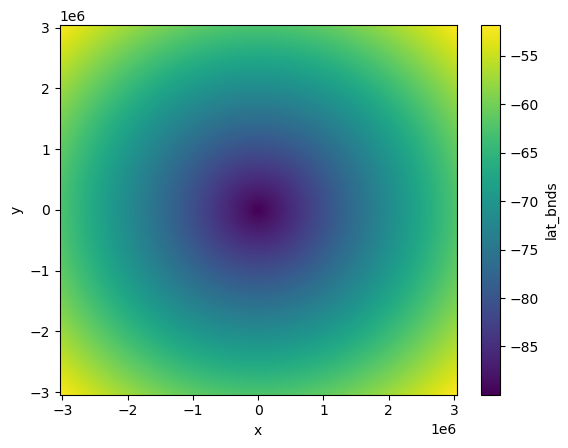

In [19]:
ISMIP_2km_new_grid['lat_bnds'].isel(nv4=0).plot()

In [20]:
ISMIP_2km_new_grid[['lon','lat']].to_netcdf(inputpath_interim + 'IMBIE_2km_stereo_mapping.nc')

In [25]:
3041 * 3041

9247681

In [15]:
with open(inputpath_interim+"stereo_grid_2km_curvilinear_definition.txt", "w") as txt_file:

    txt_file.write('# \n')
    txt_file.write('# gridID 1 \n')
    txt_file.write('# \n')
    txt_file.write('gridtype  = curvilinear \n')
    txt_file.write('gridsize  = 9247681 \n')
    txt_file.write('datatype  = float \n')
    txt_file.write('xsize     = 3041 \n')
    txt_file.write('ysize     = 3041 \n')
    txt_file.write('xname     = lon \n')
    txt_file.write('xdimname  = x \n')
    txt_file.write('xlongname = "longitude" \n')
    txt_file.write('xunits    = "degrees_east" \n')
    txt_file.write('yname     = lat \n')
    txt_file.write('ydimname  = y \n')
    txt_file.write('ylongname = "latitude" \n')
    txt_file.write('yunits    = "degrees_north" \n')
    txt_file.write('vdimname  = nv4 \n')
    txt_file.write('xvals = ')
    for vv in tqdm(meshlon.flatten()):
        txt_file.write(str(vv) + ' ')
    txt_file.write('\n')
    txt_file.write('yvals = ')
    for vv in tqdm(meshlat.flatten()):
        txt_file.write(str(vv) + ' ')
    txt_file.write('\n')
    txt_file.write('xbounds = ')
    for vv in tqdm(ISMIP_2km_new_grid['lon_bnds'].values.flatten()):
        txt_file.write(str(vv) + ' ')
    txt_file.write('\n')
    txt_file.write('ybounds = ')
    for vv in tqdm(ISMIP_2km_new_grid['lat_bnds'].values.flatten()):
        txt_file.write(str(vv) + ' ')
    txt_file.write('\n')
    txt_file.write('# \n')
    txt_file.write('# gridID 2 \n')
    txt_file.write('# \n')
    txt_file.write('gridtype = projection \n')
    txt_file.write('gridsize  = 9247681 \n')
    txt_file.write('xsize     = 3041 \n')
    txt_file.write('ysize     = 3041 \n')
    txt_file.write('xname     = x \n')
    txt_file.write('xlongname = "x-coordinate in Cartesian system" \n')
    txt_file.write('xunits = "m" \n')
    txt_file.write('yname     = y \n')
    txt_file.write('ylongname = "y-coordinate in Cartesian system" \n')
    txt_file.write('yunits = "m" \n')
    txt_file.write('xfirst = '+str(ISMIP_2km_new_grid.x.min().values)+' \n')
    txt_file.write('xinc = 2000 \n')
    txt_file.write('yfirst = '+str(ISMIP_2km_new_grid.y.min().values)+' \n')
    txt_file.write('yinc = 2000 \n')
    txt_file.write('grid_mapping = Projection \n')
    
txt_file.close()

  0%|          | 0/9247681 [00:00<?, ?it/s]

  0%|          | 0/9247681 [00:00<?, ?it/s]

  0%|          | 0/36990724 [00:00<?, ?it/s]

  0%|          | 0/36990724 [00:00<?, ?it/s]